# Exercise 08

## 1. analyze only the users and not the admins
## 2. take into account only logs from the table checker where the status is ready
## 3. you can choose the palette that you enjoy
## 4. the linewidth should be 3
## 5. the background of the graph is gray
## 6. the height should be 10, and the width should 1.5x in relation to the height
## 7. the fontsize of the title should be 30
## 8. the fontsize of the axises labels is 15

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

In [32]:
query = """
SELECT uid, timestamp, numTrials FROM checker
WHERE uid LIKE 'user_%' 
    AND status = 'ready'
    AND labname = 'project1'
ORDER BY uid
"""

df = pd.read_sql(query, connection, parse_dates=['timestamp'])
df

,uid,timestamp,numTrials
0,user_1,2020-05-14 20:56:08.898880,1
1,user_1,2020-05-14 20:58:02.313690,2
2,user_1,2020-05-14 20:58:46.322457,3
3,user_1,2020-05-14 21:08:15.434237,4
4,user_1,2020-05-14 21:10:14.867603,5
...,...,...,...
946,user_8,2020-05-14 16:18:00.528528,4
947,user_8,2020-05-14 16:41:03.916147,5
948,user_8,2020-05-14 17:40:47.781946,6
949,user_8,2020-05-14 17:46:54.469822,7


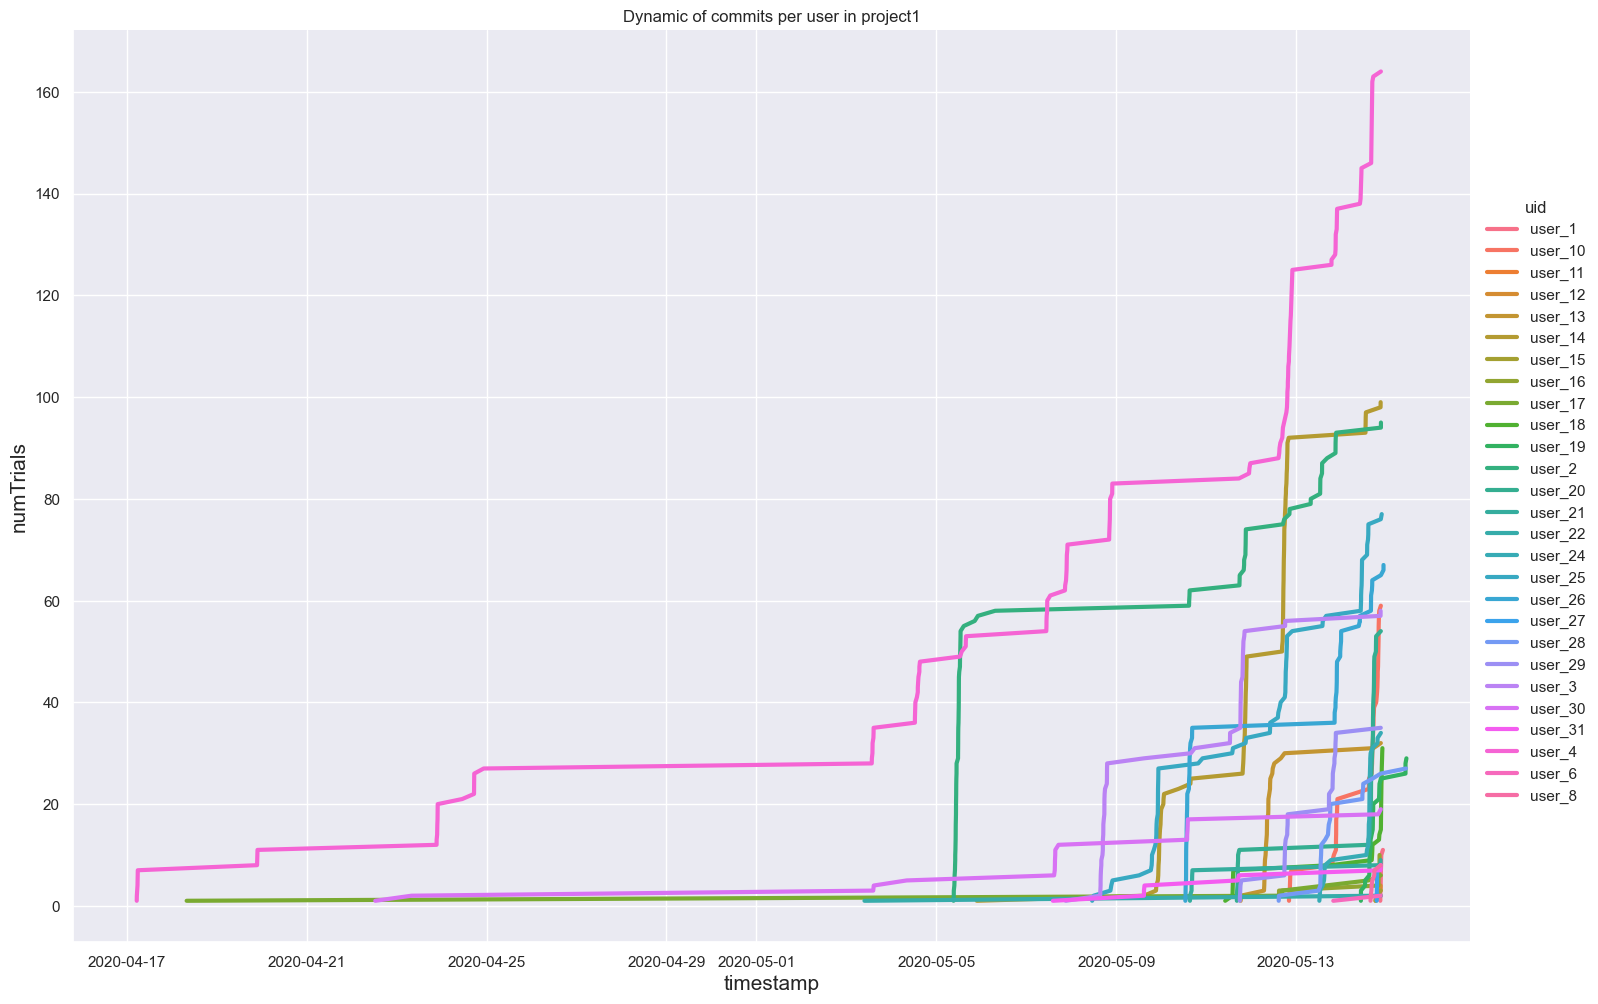

In [33]:
sns.relplot(data=df, x='timestamp', y='numTrials', hue='uid', linewidth=3, legend='full', kind='line', height=10, aspect=1.5)
plt.title('Dynamic of commits per user in project1')
plt.show()

In [34]:
connection.close()

## 9. Question

**“Which user was the leader in the number of commits almost all of the time?”** The answer: user_1.

**“Which user was the leader for only a short period of time?”** The answer: user_2.